In [119]:
import os
import cv2
import numpy as np
import Augmentor
from matplotlib import pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA



In [154]:
# Create an Augmentor Pipeline for data augmentation
augmented_data_dir = "augmented_data"
p = Augmentor.Pipeline(data_dir, f'../augmented_data')

# Define augmentations to apply
p.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
# p.zoom_random(probability=0.1, percentage_area=0.8)
p.flip_random(probability=0.5)
p.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.5)
p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)

# Sample from the pipeline to generate augmented images
augmented_images = p.sample(X_train.shape[0])

# Flatten and convert augmented images to a NumPy array
# augmented_images = np.array([np.array(img) for img in augmented_images[:3]])

# Concatenate augmented images with the original training data
# X_train_augmented = np.vstack((X_train, augmented_images))
# y_train_augmented = np.concatenate((y_train, y_train))

Initialised with 1049 image(s) found.
Output directory set to jpgData\../augmented_data.

Processing <PIL.Image.Image image mode=RGB size=416x416 at 0x1E2016D2FD0>: 100%|██████████| 839/839 [00:02<00:00, 315.53 Samples/s]                   


In [166]:
# Initialize lists to store data and labels
data = []
labels = []

# Loop through the dataset directory and load images
for class_name in np.array(os.listdir(data_dir)).astype(int):
    class_path = os.path.join(data_dir, str(class_name))
    for image_filename in os.listdir(class_path):
        image_path = os.path.join(class_path, image_filename)
        
        # Load and preprocess the image
        image = cv2.imread(image_path)
        # image = cv2.resize(image, (128, 128))  # Resize to a consistent size
        image = image.flatten()  # Flatten to convert to a 1D array
        data.append(image)
        labels.append(class_name)

In [167]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [168]:
# Loop through the dataset directory and load images
# For augmented data
for class_name in np.array(os.listdir(augmented_data_dir)).astype(int):
    class_path = os.path.join(augmented_data_dir, str(class_name))
    for image_filename in os.listdir(class_path):
        image_path = os.path.join(class_path, image_filename)
        
        # Load and preprocess the image
        image = cv2.imread(image_path)
        # image = cv2.resize(image, (128, 128))  # Resize to a consistent size
        image = image.flatten()  # Flatten to convert to a 1D array
        X_train.append(image)
        y_train.append(class_name)

# # Convert data and labels to NumPy arrays
# X_train = np.array(X_train)
# labels = np.array(labels)

In [170]:
# Apply PCA for dimensionality reduction
n_components = 200  # Number of principal components to retain
pca = PCA(n_components=n_components,
            random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [171]:
# # Train a decision tree classifier
# clf = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 2)
# clf.fit(X_train, y_train)

# Create an SVM classifier
clf = svm.SVC(C=1,
                kernel='rbf', 
                )

# Train the classifier on the training data
clf.fit(X_train_pca, y_train)

SVC(C=1)

In [172]:
# Evaluate the classifier
train_pred = clf.predict(X_train_pca)
train_accuracy = accuracy_score(train_pred, y_train)
print(f"Train Accuracy: {train_accuracy*100:.2f}%", end='\n\n')

test_pred = clf.predict(X_test_pca)
test_accuracy = accuracy_score(test_pred, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Train Accuracy: 81.82%

Test Accuracy: 68.10%


Text(0.5, 0.98, 'Confusion Matrix Evaluation')

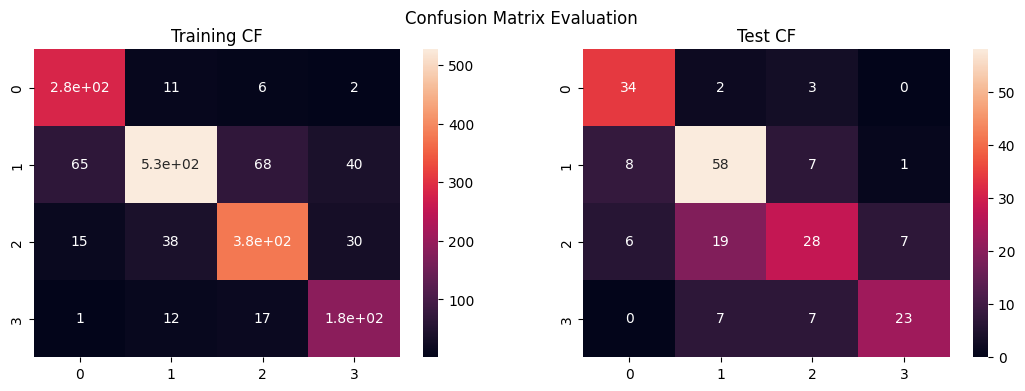

In [173]:
## Confusion Matrix
fig, ax = plt.subplots(1,2, figsize = (13,4))

train_cf = confusion_matrix(train_pred, y_train)
heatmap(train_cf, annot=True, ax=ax[0])
ax[0].set_title("Training CF")

test_cf = confusion_matrix(test_pred, y_test)
heatmap(test_cf, annot=True, ax=ax[1])
ax[1].set_title("Test CF")

fig.suptitle("Confusion Matrix Evaluation")